In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import linearsolve as ls
%matplotlib inline

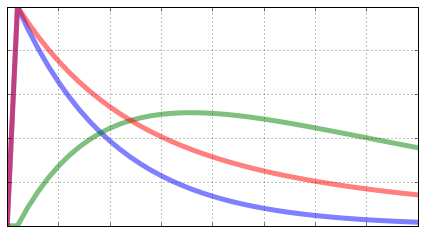

In [2]:
# Input model parameters
parameters = pd.Series()
parameters['alpha']  = .35
parameters['beta']  = 0.99
parameters['delta']   = 0.025
parameters['rhoa'] = .9
parameters['sigma'] = 1.5
parameters['A'] = 1


def equilibrium_equations(variables_forward,variables_current,parameters):
    
    # Parameters 
    p = parameters
    
    # Variables
    fwd = variables_forward
    cur = variables_current

    # Household Euler equation
    euler_eqn = p.beta*fwd.c**-p.sigma*(p.alpha*fwd.y/fwd.k+1-p.delta) - cur.c**-p.sigma
    
    # Production function
    production_fuction =  cur.a*cur.k**p.alpha - cur.y
    
    # Capital evolution
    capital_evolution = fwd.k - (1-p.delta)*cur.k - cur.i
    
    # Goods market clearing
    market_clearing = cur.c + cur.i - cur.y
        
    # Exogenous technology
    technology_proc = cur.a**p.rhoa- fwd.a
    
    # Stack equilibrium conditions into a numpy array
    return np.array([
            euler_eqn,
            production_fuction,
            capital_evolution,
            market_clearing,
            technology_proc
        ])


# Initialize the model
rbc = ls.model(equations = equilibrium_equations,
               nstates=2,
               varNames=['a','k','c','y','i'],
               shockNames=['eA','eK'],
               parameters=parameters)

# Steady state solution
p = parameters
K = (p.alpha*p.A/(1/p.beta+p.delta-1))**(1/(1-p.alpha))
C = p.A*K**p.alpha - p.delta*K
Y = p.A*K**p.alpha
I = Y - C

rbc.set_ss([p.A,K,C,Y,I])

# Find the log-linear approximation around the non-stochastic steady state
rbc.log_linear_approximation()

# Solve the model
rbc.solve_klein(rbc.a,rbc.b)

# Compute impulse responses and plot
rbc.impulse(T=41,t0=1,shocks=None,percent=True)
fig = plt.figure(figsize=(6, 6/262*146))
ax = fig.add_subplot(1,1,1)
rbc.irs['eA'][['a','k','y']].plot(lw='5',alpha=0.5,grid=True,ax = ax,legend=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()
plt.savefig('econ126Img_ir.png',bbox_inches='tight',dpi=120)

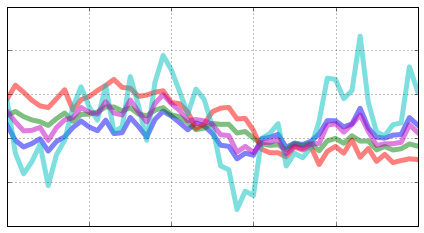

In [3]:
# Compute impulse responses and plot
rbc.stoch_sim(seed = 789)
fig = plt.figure(figsize=(6, 6/262*146))
ax = fig.add_subplot(1,1,1)
rbc.simulated[['a','c','k','i','y']].plot(legend=False,ax=ax,lw='5',alpha=0.5)
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()

plt.savefig('econ126Img_sim.png',bbox_inches='tight',dpi=120)